### First we read the datasets
#### we simply define some colors for the clusters corresponding to each dataset(for example dataset 1 will have 2 clusters later)

In [301]:
import pandas as pd
df1 = pd.read_csv("./first_clustering_dataset.csv", header=None)
df2 = pd.read_csv("./second_clustering_dataset.csv", header=None)
df3 = pd.read_csv("./third_clustering_dataset.csv", header=None)

df1_color_set = {0: "#4682b4", 1: "#ad0a51"}
df2_color_set = {0: "#8a2e22", 1: "#8a5322", 2: "#8a7222", 3: "#878a22",
                 4: "#698a22", 5: "#3e8a22", 6: "#22878a", 7: "#22668a", 8: "#223f8a"}
df2_color_set2 ={0: "#4682b4", 1: "#ad0a51", 2: "#0aad8a"}
df3_color_set = {0: "#4682b4", 1: "#ad0a51", 2: "#0aad8a", 3: "#9f0aad", 4: "#0a64ad"}
df3_color_set2 ={0: "#4682b4", 1: "#ad0a51"}


## Just a quick review of the datasets

In [302]:
print(df1)
print("============================================")
df1.describe()

            0         1
0   -0.125391 -1.268829
1    0.062522  1.278778
2   -0.048762  0.200549
3    0.105585 -0.496629
4    0.011886 -0.739317
..        ...       ...
395  0.248226 -1.088287
396  0.205768 -0.421411
397  0.269167  0.695011
398  0.211597  0.977275
399  0.261713 -0.993928

[400 rows x 2 columns]


,0,1
count,400.000000,400.000000
mean,0.124219,-0.012087
std,0.139098,0.988992
min,-0.135468,-3.286417
25%,-0.000858,-0.727178
50%,0.135032,0.028863
75%,0.251976,0.639484
max,0.365536,2.967989


In [303]:
print(df2)
print("============================================")
df2.describe()

             0          1
0     1.047961   0.357217
1     0.201221   0.295197
2     0.163506  -1.846756
3     0.876857   1.499314
4     1.389838   0.092843
..         ...        ...
445  12.353425  21.892071
446  12.398762  21.301938
447  12.713268  19.627323
448  13.503682  20.372600
449  12.546129  19.866065

[450 rows x 2 columns]


,0,1
count,450.000000,450.000000
mean,12.973701,6.685215
std,8.610405,7.634260
min,-2.655059,-2.243070
25%,5.687410,0.154821
50%,12.872814,4.359575
75%,20.514214,14.873280
max,28.847761,23.683402


In [304]:
print(df3)
print("============================================")
df3.describe()

            0         1
0    0.315715  0.230080
1   -0.420268  0.609144
2    0.102944 -1.117928
3   -0.105657 -0.112488
4   -0.674778  0.130790
..        ...       ...
495  1.618047  2.610644
496  1.997595  1.888732
497  2.870525  1.726396
498  1.760763  2.430575
499  2.541713  1.661525

[500 rows x 2 columns]


,0,1
count,500.000000,500.000000
mean,2.048625,1.208745
std,1.649316,1.104357
min,-1.295953,-1.511252
25%,0.460990,0.169674
50%,2.020882,1.657572
75%,3.676495,2.121065
max,4.998794,3.005554


### Now first plots of datasets

#### For the first data set it seems to have 2 clusters. so 2 is our guess. we'll see later if 2 is a good guess

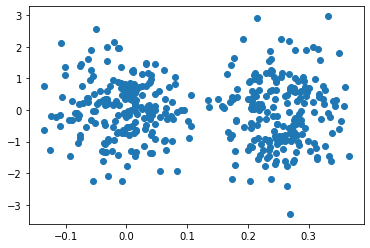

In [305]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x=df1[0], y=df1[1])

#### For the second data set it seems to have 9 clusters. so 9 is our guess. but in another way it also may have 3 clusters. we'll see later if 9 or 3 is a good guess

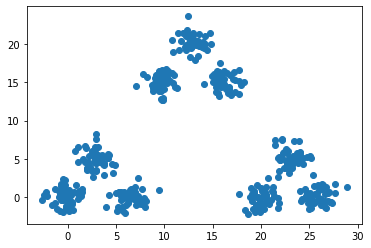

In [306]:
plt.scatter(x=df2[0], y=df2[1])

#### For the third data set it seems to have 5 clusters. so 5 is our guess. we'll see later if 5 is a good guess

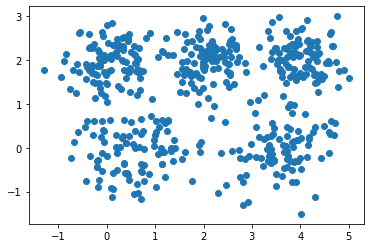

In [307]:
plt.scatter(x=df3[0], y=df3[1])

## Here we define the main function for KMeans model. it gets the dataset as "df", number of desired clusters as "n_clusters" and the corresponding color set.
### Then it fits the model. predict the data. and plot some stuff and measures it with silhouette_score and prints all we need

In [308]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def reportSilhouetteScore(df, labels):
    print(f"silhouette_score: {silhouette_score(df, labels)}")


def runKMeans(df, n_clusters, color_set):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(df)
    plotKMeansClusteringResult(df, model, color_set)
    print(f"SSE: {model.inertia_}")
    reportSilhouetteScore(df, labels)

def plotKMeansClusteringResult(df, model, color_set):
    plt.scatter(df[0], df[1], c=[color_set[c] for c in model.predict(df)])
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='black')   


### And here we just need to all the function we mentioned earlier.

##### First dataset

SSE: 146.88856005335137
silhouette_score: 0.5362906097948957


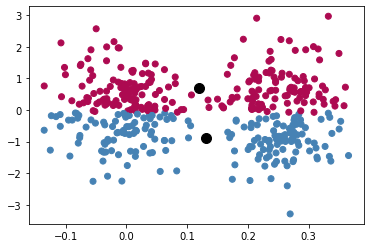

In [309]:
runKMeans(df1, 2, df1_color_set)

not good!

#### Second dataset (for 9 clusters)

SSE: 859.3931951407194
silhouette_score: 0.6925519321164127


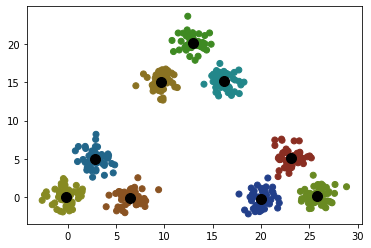

In [310]:
runKMeans(df2, 9, df2_color_set)

seems pretty good!

#### Second dataset (with 3 clusters)

SSE: 6487.004526263209
silhouette_score: 0.7240379233766401


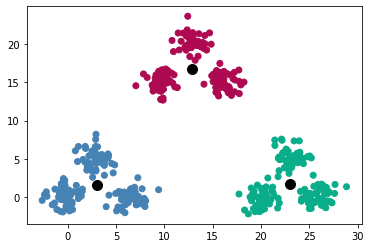

In [311]:
runKMeans(df2, 3, df2_color_set2)

pretty good again!

#### Third dataset:

SSE: 222.3659877692909
silhouette_score: 0.5604142087131664


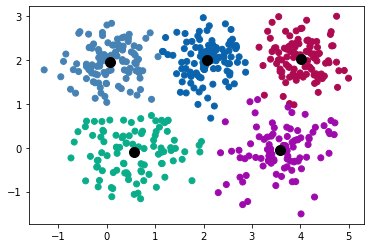

In [312]:
runKMeans(df3, 5, df3_color_set)

SSE: 908.1713254614044
silhouette_score: 0.4597651234688414


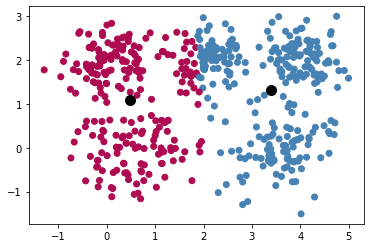

In [313]:
runKMeans(df3, 2, df3_color_set2)

pretty good again!

#### So far Kmean has woked very well!

### To make sure if the guessed n_clusters are correct we need to draw the Knee point plot:
#### To do this we just define a function that creates the model 200 times with k=0, ... 16 and then calculates the mean of it and the plot it

In [314]:
def drawKneePoint(df):
    Ys = []
    for k in range(1, 16):
        l = []
        for i in range(20): #20 is enough. most are the same!
            model = KMeans(n_clusters=k, random_state=i)
            model.fit(df)
            l.append(model.inertia_)
        Ys.append(sum(l)/len(l))
    plt.scatter(x=[i for i in range(1, 16)], y=Ys)
    plt.plot([i for i in range(1, 16)], Ys)
    


### Now we just call the function
#### First dataset

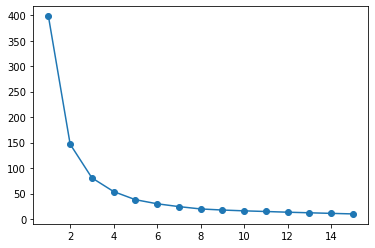

In [315]:
drawKneePoint(df1)

#### K=2 is the knee point

#### Second dataset

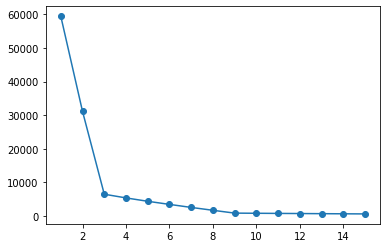

In [316]:
drawKneePoint(df2)

#### K=3 is the knee point
##### Also K=9 can be a knee point(as we can guess by eye)

#### Third dataset

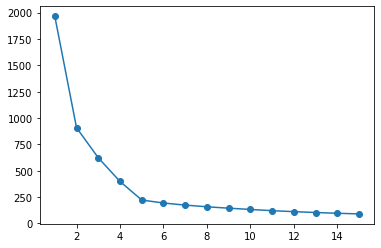

In [317]:
drawKneePoint(df3)

#### K=2 and K=5 are knee points.
#### we'll see the score for them later

## Now we go for the FCM model. Just the same we just define a function that does all the stuff for us and later we just call it with the three datasets

In [318]:

from fcmeans import FCM
def runFCM(X, n_clusters, color_set):
    model = FCM(n_clusters=n_clusters, random_state=42)
    model.fit(X)
    labels = model.predict(X)
    # print(labels)
    plotFCMClusteringResult(X, model, color_set)
    reportSilhouetteScore(X, labels)
    
def plotFCMClusteringResult(X, model, color_set):
    plt.scatter(X[:, 0], X[:, 1], c=[color_set[c] for c in model.predict(X)])
    plt.scatter(model.centers[:, 0], model.centers[:, 1], s=100, c='black')   



#### First dataset

silhouette_score: 0.5362906097948957


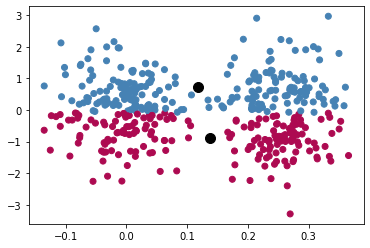

In [319]:
runFCM(df1.values, 2, df1_color_set)


Not good!

#### Second dataset(9 clusters)

silhouette_score: 0.5681960198683133


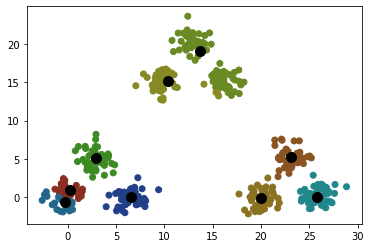

In [320]:
runFCM(df2.values, 9, df2_color_set)

seems good but centroids are not much percise and also one cluster is merged with another one

#### Second dataset(3 clusters)

silhouette_score: 0.7240379233766401


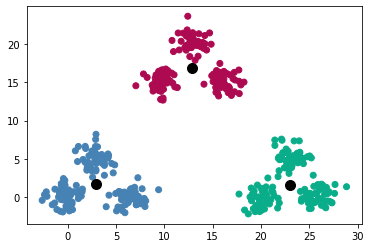

In [321]:
runFCM(df2.values, 3, df2_color_set2)

Pretty good

#### Third dataset

silhouette_score: 0.45534072562474137


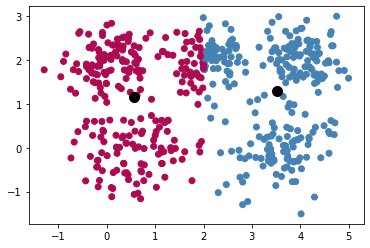

In [322]:
runFCM(df3.values, 2, df3_color_set2)

silhouette_score: 0.5605130818892635


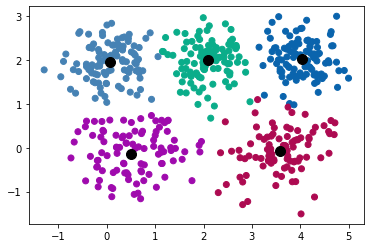

In [323]:
runFCM(df3.values, 5, df3_color_set)

it seems that our guess got more score! (56 compare to 45)

it proves that in the knee point plot k=5 is better!

### At the end, again we define a function ...

In [324]:
from sklearn.cluster import DBSCAN
def runDBScan(df, **params):
    model = DBSCAN(**params)
    labels = model.fit_predict(df)
    
    plotDBScanClusteringResult(df, labels)
    reportSilhouetteScore(df, labels)


def plotDBScanClusteringResult(df, labels):
    plt.scatter(df[0], df[1], c=labels)



#### First dataset

silhouette_score: 0.503987643756188


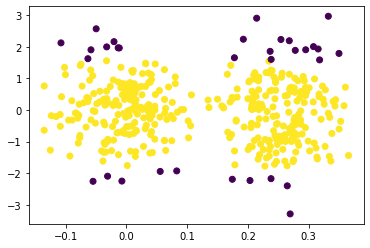

In [325]:
runDBScan(df1, eps=0.32, min_samples=33)

Very Bad!!!

#### Second dataset

silhouette_score: 0.7240379233766401


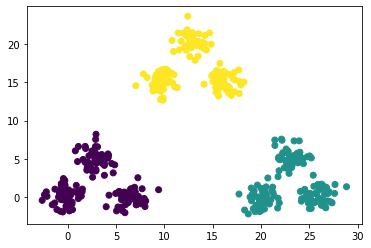

In [326]:
runDBScan(df2, eps=2.9, min_samples=20)

Bad!

#### Third dataset

silhouette_score: 0.43974768868065206


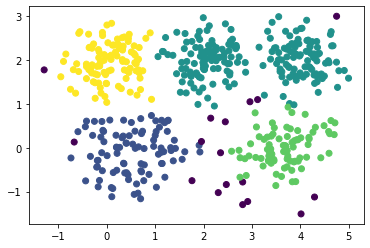

In [327]:
runDBScan(df3, eps=0.55, min_samples=20)

Bad again!

## Conclusion

#### Before the comparison we should say that we didn't need to repeat running model 200 times because the results were the same.(even when setting the "random_state" each time with a different number)

### Comparison

|K-Means SSE                | SSE                   |
|---------------------------|-----------------------|
|Dataset(I) 2 clusters      |146.88856005335137     |
|Dataset(II) 9 clusters     |859.3931951407194      |
|Dataset(II) 3 clusters     |6487.00452626321       |
|Dataset(III) 5 clusters    |222.36598776929088     |
|Dataset(III) 2 clusters    |908.1713254614045      |

|Silhoutter Score           | K-Means               | FCM               | result of comparison |
|---------------------------|-----------------------|-------------------|----------------------|
|Dataset(I) 2 clusters      |0.5362906097948957     |0.5362906097948957 | both the same        |
|Dataset(II) 9 clusters     |0.6925519321164127     |0.5681960198683133 | K-Means better       |
|Dataset(II) 3 clusters     |0.7240379233766401     |0.7240379233766401 | both the same        |
|Dataset(III) 5 clusters    |0.5604142087131664     |0.5605130818892635 | K-Means a bit better |
|Dataset(III) 2 clusters    |0.4597651234688414     |0.45534072562474137| K-Means a bit better |

|Silhoutter Score           | DBSCAN                |
|---------------------------|-----------------------|
|Dataset(I)                 |0.503987643756188      |
|Dataset(II)                |0.7240379233766401     |
|Dataset(III)               |0.43974768868065206    |
 

In compare to DBSCAN; for the second data set all three models were the same.
For Other dataset K-Means were better a bit.